In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    # # "internlm/internlm2_5-1_8b-chat",
    # # "internlm/internlm2_5-7b-chat",
    # # "internlm/internlm2_5-20b-chat",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "mistralai/Mathstral-7B-v0.1",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/phi-4",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]

In [2]:
# PROMP_LIST = ["-sbs-budget-hard", "-aav", "-c2f", "-sbs", "-sbs-hard"]
PROMP_LIST = ["-sbs","-c2f","-aav"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    "internlm/internlm2_5-1_8b-chat": "internlm",
    "internlm/internlm2_5-7b-chat": "internlm",
    "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [3]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        
        return budget_list


In [4]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [5]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-sbs': [37.3,
   38.4,
   40.7,
   44.0,
   50.9,
   58.5,
   65.0,
   72.6,
   77.6,
   81.4,
   85.8,
   89.0,
   92.6,
   94.2,
   95.6,
   96.0,
   95.9,
   95.8,
   95.9,
   95.9,
   96.1,
   96.2,
   96.1,
   96.1],
  'qwen-c2f': [38.7,
   44.6,
   50.2,
   56.0,
   62.9,
   70.0,
   76.1,
   82.6,
   85.4,
   87.6,
   90.0,
   90.8,
   92.6,
   93.6,
   94.5,
   94.7,
   94.6,
   94.8,
   95.3,
   95.1,
   95.2,
   95.4,
   95.5,
   95.5],
  'qwen-aav': [39.3,
   46.6,
   59.2,
   69.5,
   77.9,
   83.7,
   88.5,
   91.1,
   92.6,
   93.8,
   94.6,
   94.5,
   94.9,
   95.0,
   95.1,
   94.8,
   95.1,
   95.1,
   94.9,
   94.8,
   95.0,
   95.0,
   95.0,
   95.1]},
 'Qwen/QwQ-32B-Preview': {'qwen-sbs': [35.4,
   36.2,
   36.5,
   37.5,
   41.5,
   45.7,
   51.0,
   60.0,
   65.8,
   71.0,
   75.7,
   80.1,
   84.8,
   89.0,
   91.0,
   93.7,
   94.5,
   94.6,
   94.8,
   95.5,
   95.3,
   95.5,
   95.5,
   95.2],
  'qwen-c2f': [36.4,
   41

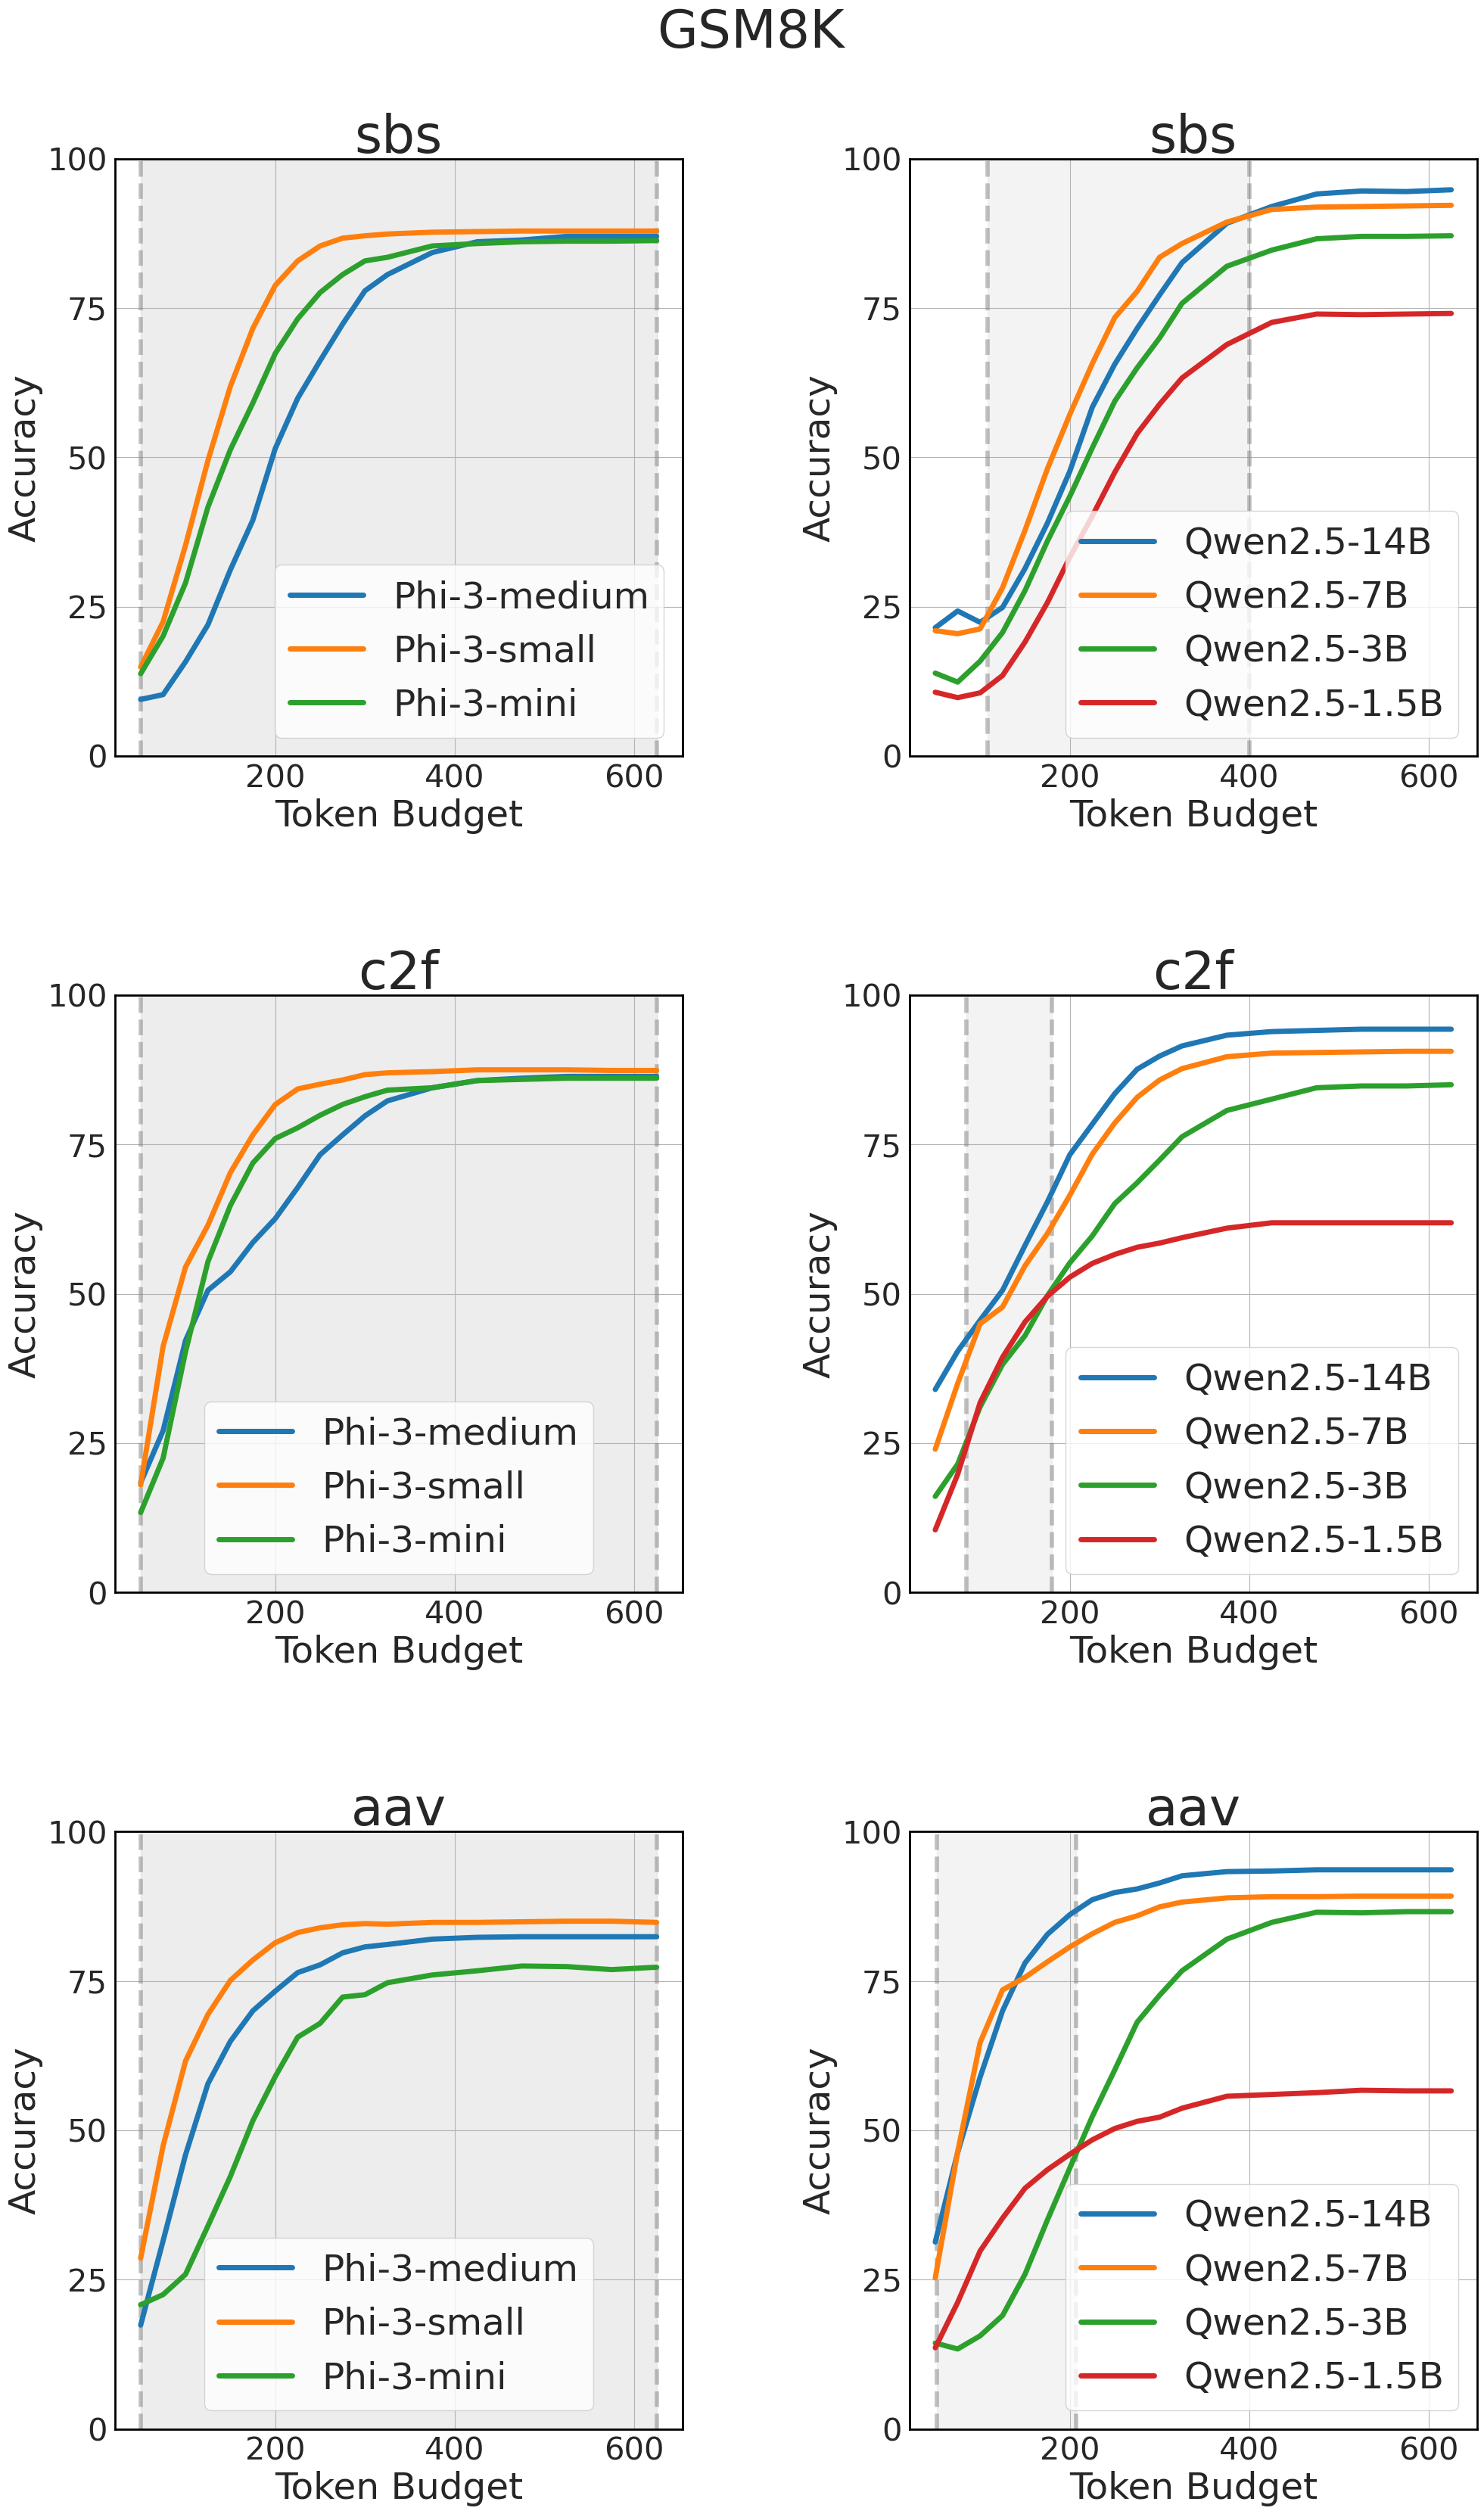

In [6]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.7"})
fig, axs = plt.subplots(3,2, figsize=(20, 40))
line_width = 5   # Set the desired line width
phi3_model_list = [
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
]
fontsize = 35
qwen_model_list = [
    # "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
]

# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.9)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for index, prompt_type in enumerate(PROMP_LIST):
    # Convert single index to row, col indices
    for model in phi3_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        axs[index*2].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1] + "-" + model.split("/")[-1].split("-")[2], linewidth=line_width)

    for model in qwen_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        axs[int(index*2+1)].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1], linewidth=line_width)

    axs[index*2].set_xlabel("Token Budget", fontsize=fontsize)
    axs[index*2].set_ylabel("Accuracy", fontsize=fontsize)
    axs[index*2].set_title(prompt_type[1:], fontsize=50)
    axs[index*2].legend(fontsize=35)
    axs[index*2].set_yticks(range(0, 101, 25)) 
    axs[index*2].set_xticks(range(0, 601, 200))  
    axs[index*2].tick_params(axis='both', which='major', labelsize=30)
    axs[int(index*2+1)].set_xlabel("Token Budget", fontsize=fontsize)
    axs[int(index*2+1)].set_ylabel("Accuracy", fontsize=fontsize)
    axs[int(index*2+1)].set_title(prompt_type[1:], fontsize=50)
    axs[int(index*2+1)].legend(fontsize=35)
    axs[int(index*2+1)].set_yticks(range(0, 101, 25))
    axs[int(index*2+1)].set_xticks(range(0, 601, 200))
    axs[int(index*2+1)].tick_params(axis='both', which='major', labelsize=30)

    axs[index*2].axvline(
        x=50,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[index*2].axvline(
        x=625,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.5,         # transparency
        zorder=1           # layer order
    )
    axs[index*2].axvspan(
        xmin=50, 
        xmax=625,           # x range
        # y1=0, y2=100,          # y range
        color='grey',      # fill color
        alpha=0.14,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    axs[5].axvline(
        x=52,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )
    axs[5].axvline(
        x=207,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )
    axs[5].axvspan(
        xmin=52, 
        xmax=207,           # x range
        # y1=0, y2=100,          # y range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    axs[3].axvspan(
        xmin=85,
        xmax=180,           # x range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    # axs[1].axvspan(
    #     xmin=270,
    #     xmax=330,           # x range
    #     color='grey',      # fill color
    #     alpha=0.03,             # transparency
    #     zorder=0               # ensure shading is behind lines
    # )
    axs[3].axvline(
        x=85,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )
    axs[3].axvline(
        x=180,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )
    # axs[1].axvline(
    #     x=270,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=1,        # line width
    #     alpha=0.5,         # transparency
    #     zorder=1           # layer order
    # )
    # axs[1].axvline(
    #     x=330,               # x position
    #     color='gray',       # line color
    #     linestyle='--',     # dashed line
    #     linewidth=1,        # line width
    #     alpha=0.5,         # transparency
    #     zorder=1           # layer order
    # )

    axs[1].axvspan(
        xmin=108, 
        xmax=400,           # x range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[1].axvline(
        x=108,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvline(
        x=400,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.2,         # transparency
        zorder=1           # layer order
    )

for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')
# Adjust layout
plt.tight_layout()
# fig.subplots_adjust(top=0.9)
plt.subplots_adjust(
    left=0.08,      # Left margin
    right=0.98,     # Right margin
    bottom=0.1,    # Bottom margin
    top=0.85,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.4     # Height spacing between subplots
)
plt.savefig("findings3_gsm8k_all.pdf")

In [7]:
dataset = "math500"
something = "_-1_seed0_t0.0_s0_e-1"

In [8]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'NovaSky-AI/Sky-T1-32B-Preview': {'qwen-sbs': [34.6,
   35.0,
   36.4,
   36.6,
   36.6,
   38.8,
   41.0,
   43.0,
   45.0,
   47.2,
   51.0,
   52.2,
   55.2,
   57.0,
   58.8,
   60.2,
   61.6,
   62.4,
   65.0,
   65.0,
   66.4,
   68.2,
   69.0,
   70.6,
   74.6,
   76.6,
   78.8,
   80.6,
   83.0,
   84.0,
   84.6,
   84.8,
   85.4,
   86.0,
   86.6,
   87.6,
   87.8,
   88.2,
   88.2,
   88.0,
   87.8,
   88.0],
  'qwen-c2f': [37.4,
   36.8,
   38.4,
   40.4,
   43.2,
   42.8,
   46.8,
   49.8,
   50.4,
   53.6,
   57.0,
   58.6,
   58.0,
   61.6,
   61.0,
   63.6,
   64.2,
   65.0,
   67.0,
   65.6,
   68.0,
   68.0,
   69.6,
   70.4,
   73.4,
   76.0,
   78.6,
   79.8,
   80.6,
   81.2,
   81.8,
   81.6,
   82.6,
   82.8,
   83.0,
   83.2,
   83.2,
   83.2,
   83.6,
   84.0,
   84.0,
   84.8],
  'qwen-aav': [36.8,
   36.0,
   39.2,
   40.0,
   44.6,
   48.0,
   50.6,
   53.6,
   55.2,
   56.2,
   60.2,
   61.2,
   62.8,
   63.2,
   64.4,
   65.8,
   69.0,
   69.0,
   70.8,
  

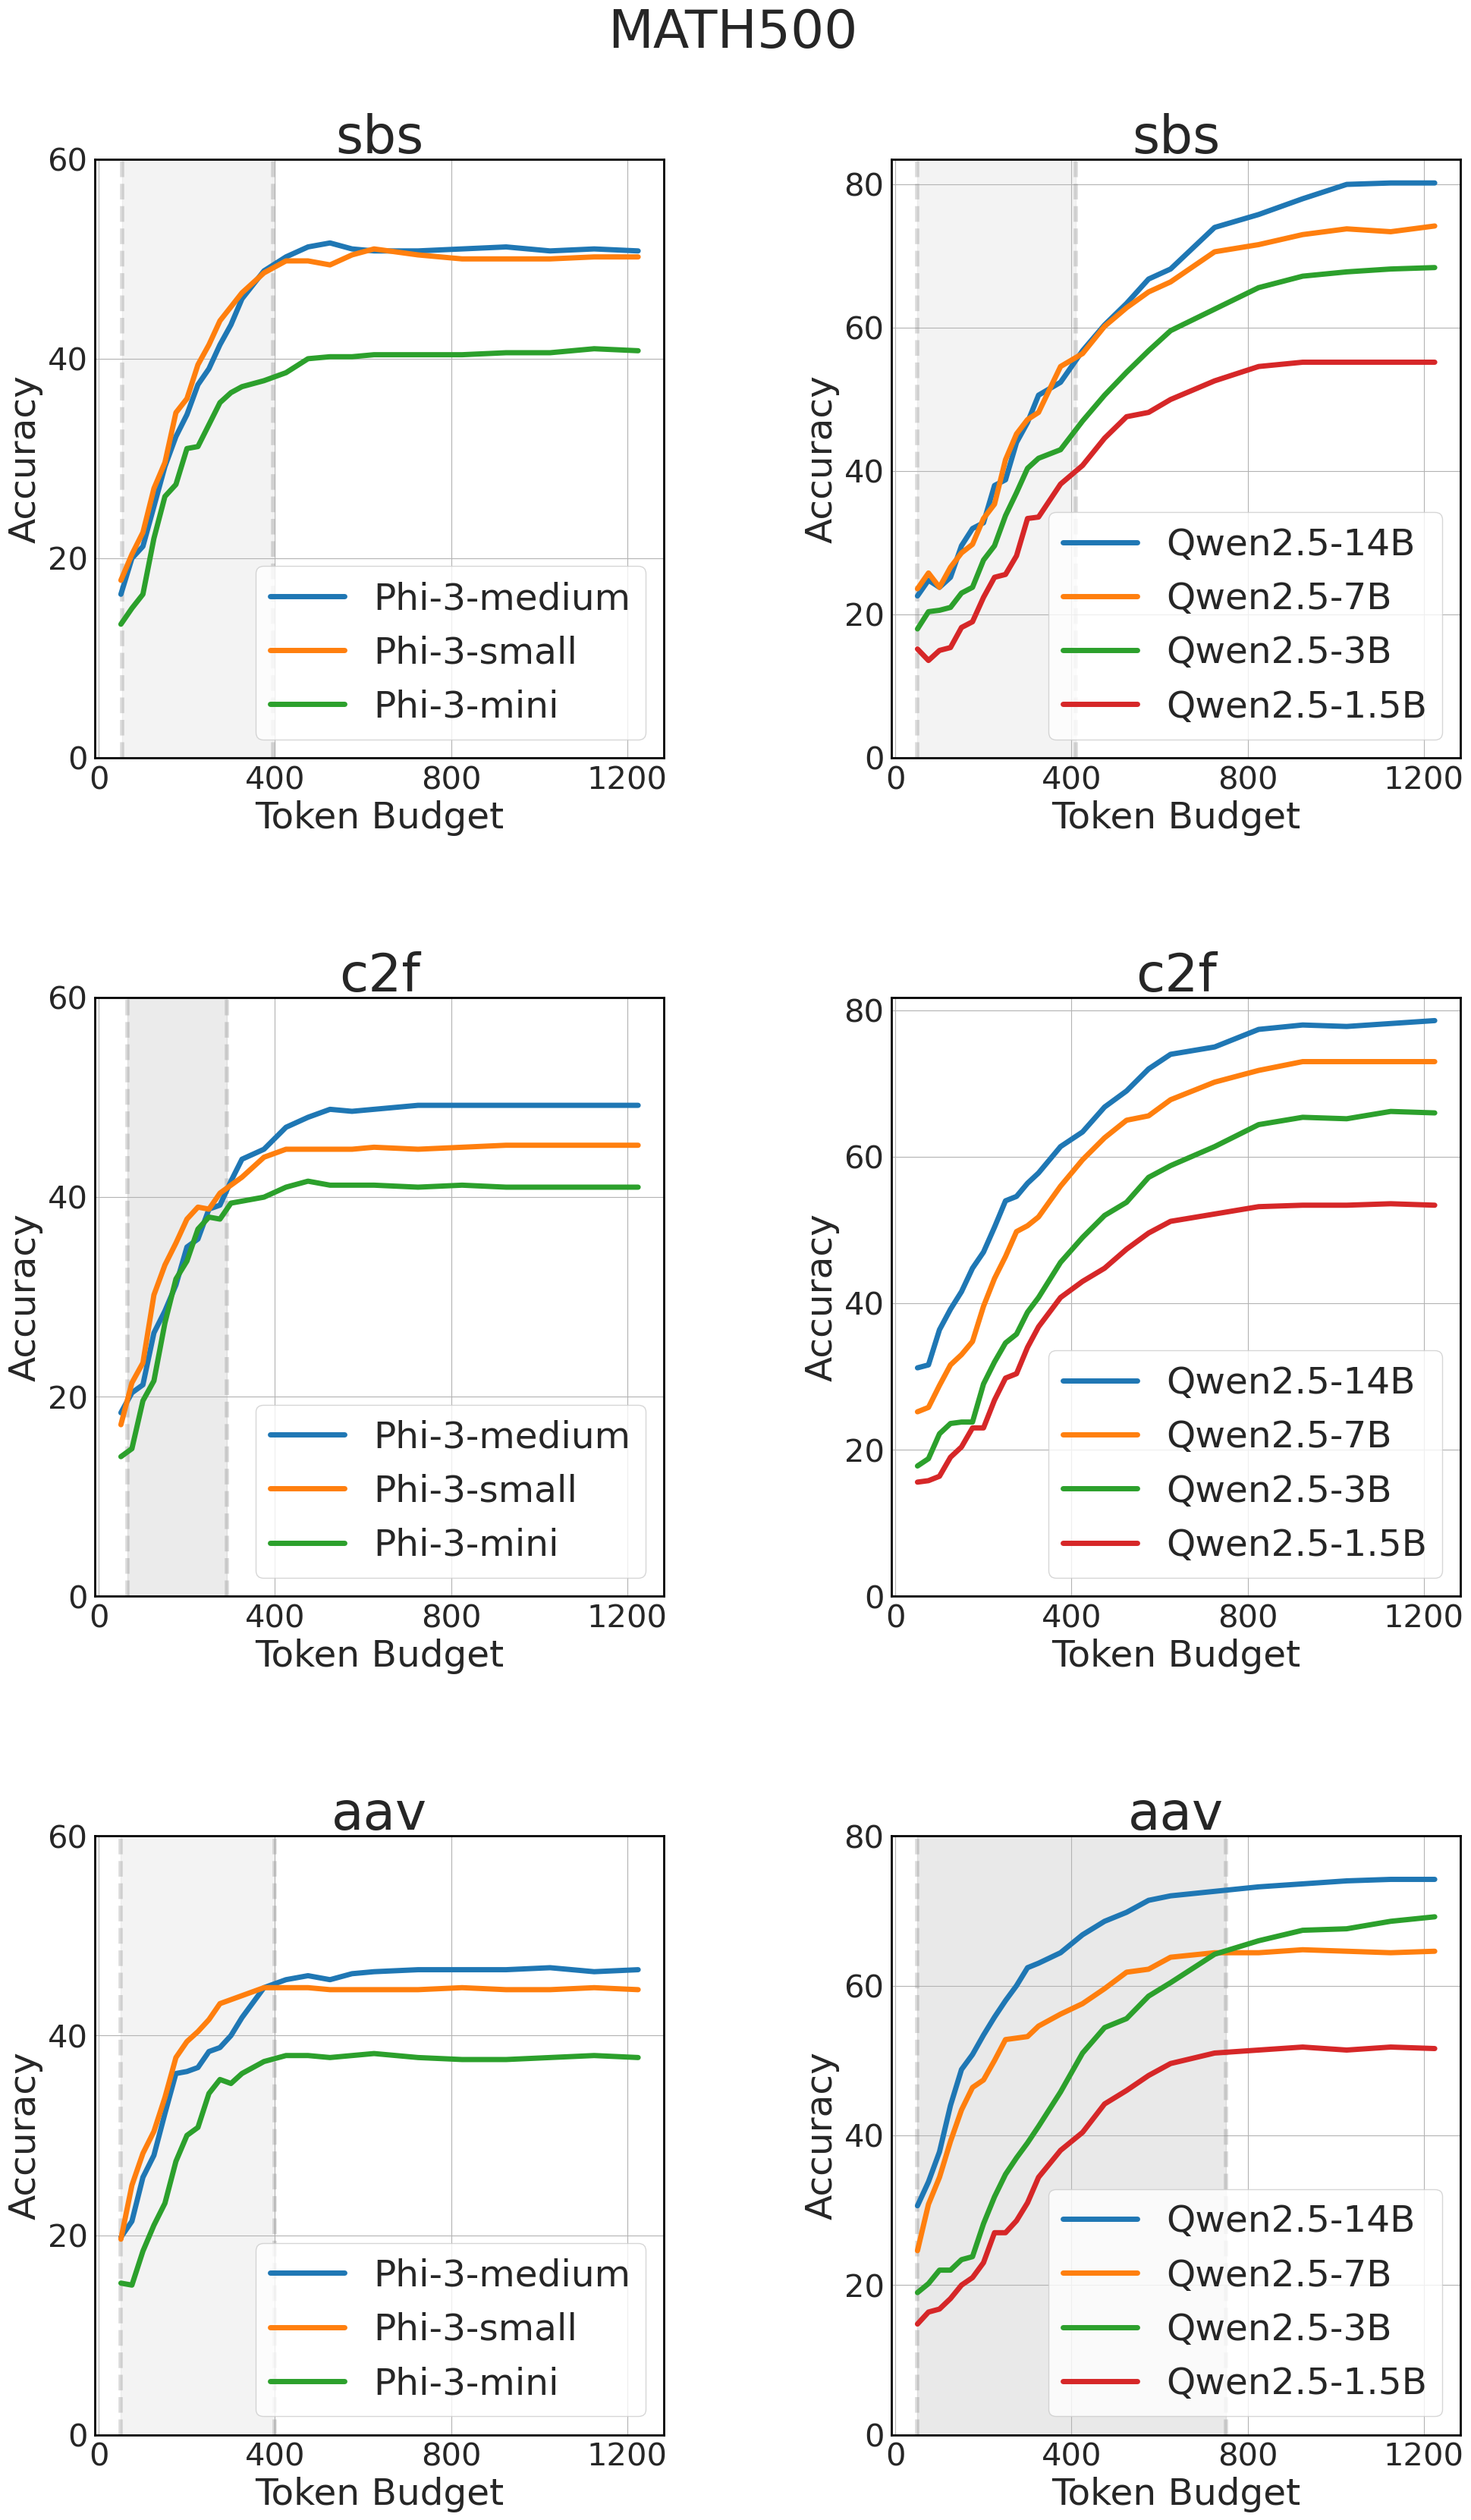

In [9]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.7"})
fig, axs = plt.subplots(3,2, figsize=(20, 40))
line_width = 5   # Set the desired line width
fontsize = 35
# set the title
fig.suptitle(f"{dataset}".upper(), fontsize=50, y=0.9)

# Flatten the axes array for easy iteration
axs = axs.flatten()

for index, prompt_type in enumerate(PROMP_LIST):
    # Convert single index to row, col indices
    for model in phi3_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        axs[index*2].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1] + "-" + model.split("/")[-1].split("-")[2], linewidth=line_width)

    for model in qwen_model_list:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        axs[int(index*2+1)].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1].split("-")[0] + "-" + model.split("/")[-1].split("-")[1], linewidth=line_width)

    axs[index*2].set_xlabel("Token Budget", fontsize=fontsize)
    axs[index*2].set_ylabel("Accuracy", fontsize=fontsize)
    axs[index*2].set_title(prompt_type[1:], fontsize=50)
    axs[index*2].legend(fontsize=35)
    axs[index*2].set_yticks(range(0, 61, 20)) 
    axs[index*2].set_xticks(range(0, 1201, 400))  
    axs[index*2].tick_params(axis='both', which='major', labelsize=30)
    axs[int(index*2+1)].set_xlabel("Token Budget", fontsize=fontsize)
    axs[int(index*2+1)].set_ylabel("Accuracy", fontsize=fontsize)
    axs[int(index*2+1)].set_title(prompt_type[1:], fontsize=50)
    axs[int(index*2+1)].legend(fontsize=35)
    axs[int(index*2+1)].set_yticks(range(0, 81, 20))
    axs[int(index*2+1)].set_xticks(range(0, 1201, 400))
    axs[int(index*2+1)].tick_params(axis='both', which='major', labelsize=30)

    axs[0].axvline(
        x=52,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[0].axvline(
        x=395,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[0].axvspan(
        xmin=52, 
        xmax=395,           # x range
        # y1=0, y2=100,          # y range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    axs[2].axvspan(
        xmin=65,
        xmax=290,           # x range
        color='grey',      # fill color
        alpha=0.05,             # transparency
        zorder=0               # ensure shading is behind lines
    )

    axs[2].axvline(
        x=65,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[2].axvline(
        x=290,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )

    axs[4].axvspan(
        xmin=50, 
        xmax=400,           # x range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[4].axvline(
        x=50,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[4].axvline(
        x=400,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )

    axs[5].axvspan(
        xmin=50, 
        xmax=750,           # x range
        color='grey',      # fill color
        alpha=0.06,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[5].axvline(
        x=50,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[5].axvline(
        x=750,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )

    axs[1].axvspan(
        xmin=50, 
        xmax=410,           # x range
        color='grey',      # fill color
        alpha=0.03,             # transparency
        zorder=0               # ensure shading is behind lines
    )
    axs[1].axvline(
        x=50,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )
    axs[1].axvline(
        x=410,               # x position
        color='gray',       # line color
        linestyle='--',     # dashed line
        linewidth=4,        # line width
        alpha=0.1,         # transparency
        zorder=1           # layer order
    )

for ax in axs:
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        spine.set_color('black')
# Adjust layout
plt.tight_layout()
# fig.subplots_adjust(top=0.9)
plt.subplots_adjust(
    left=0.08,      # Left margin
    right=0.98,     # Right margin
    bottom=0.1,    # Bottom margin
    top=0.85,       # Top margin
    wspace=0.4,    # Width spacing between subplots
    hspace=0.4     # Height spacing between subplots
)
plt.savefig("findings3_math500_all.pdf")